In [42]:
%%writefile streamlit_app.py

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pickle
import streamlit as st
from streamlit import _container
from pyngrok import ngrok
import os


(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


Overwriting streamlit_app.py


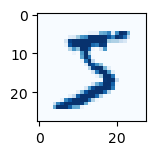

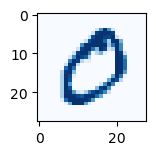

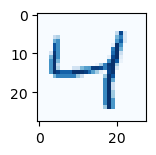

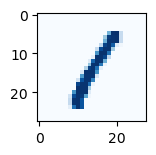

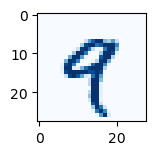

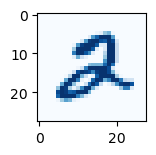

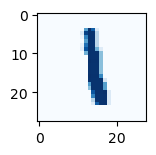

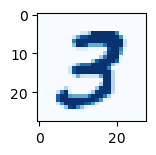

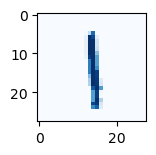

In [20]:
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('Blues'))
    pyplot.show()

In [23]:
# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Mise à l'échelle des valeurs des pixels entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Appliquer One-Hot Encoding aux étiquettes
y_train = to_categorical(y_train, 10)  # 10 classes pour les chiffres de 0 à 9
y_test = to_categorical(y_test, 10)

# Assurez-vous que les formes des données sont correctes
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)

# Afficher les formes après prétraitement
print("Forme des données d'entraînement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)
print("Forme des données de test :", x_test.shape)
print("Forme des étiquettes de test :", y_test.shape)

Forme des données d'entraînement : (60000, 28, 28)
Forme des étiquettes d'entraînement : (60000, 10)
Forme des données de test : (10000, 28, 28)
Forme des étiquettes de test : (10000, 10)


In [36]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [28]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10


938/938 [==============================] - 7s 6ms/step - loss: 0.1832 - accuracy: 0.9444 - val_loss: 0.0527 - val_accuracy: 0.9829
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.0456 - val_accuracy: 0.9855
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0300 - val_accuracy: 0.9902
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0239 - val_accuracy: 0.9917
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0337 - val_accuracy: 0.9901
Epoc

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0293 - accuracy: 0.9917
Test Loss: 0.029277145862579346
Test Accuracy: 0.9916999936103821


In [32]:


# Sauvegarder le modèle entraîné dans le format Keras natif
model.save('mon_modele_mnist.keras')

# Save the training history
with open('training_history.pkl', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [34]:
# Charger le modèle sauvegardé
modele_charge = load_model('mon_modele_mnist.keras')

Epoch 1/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0334 - val_accuracy: 0.9909
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0305 - val_accuracy: 0.9933
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0371 - val_accuracy: 0.9923
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0347 - val_accuracy: 0.9919
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0349 - val_accuracy: 0.9917
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0319 - val_accuracy: 0.9931
Epoch 

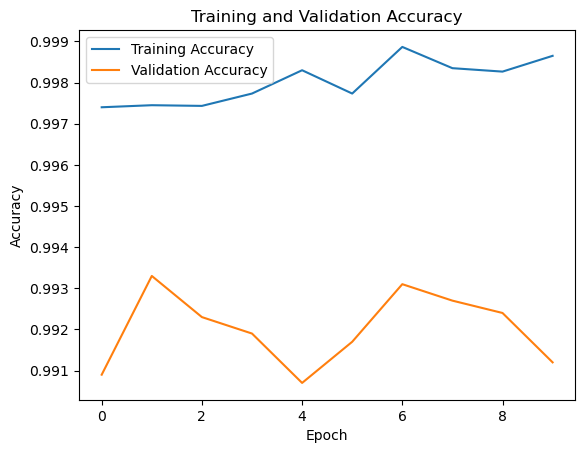

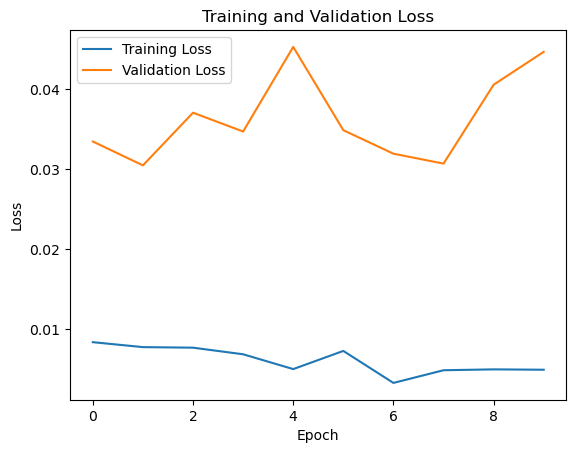

In [35]:
# Train the model and store the history
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# Charger le modèle
model = load_model('mon_modele_mnist.keras')

# Fonction pour prédire avec le modèle
def predict(image):
    # Prétraiter l'image
    processed_image = preprocess_image(image)
    # Effectuer la prédiction
    predictions = model.predict(processed_image)
    # Renvoyer la classe prédite
    return np.argmax(predictions)

# Fonction pour prétraiter l'image
def preprocess_image(image):
    # Appliquer le prétraitement nécessaire à l'image
    # ... (ajoutez votre propre prétraitement ici)
    return image

# Interface utilisateur Streamlit
st.title('MNIST Classifier App')
uploaded_image = st.file_uploader('Choose an image...', type=['jpg', 'png', 'jpeg'])

if uploaded_image is not None:
    # Afficher l'image téléchargée
    st.image(uploaded_image, caption='Uploaded Image.', use_column_width=True)

    # Prévoir avec le modèle
    image_array = preprocess_image(uploaded_image)
    prediction = predict(image_array)

    # Afficher la prédiction
    st.write('Prediction:', prediction)

2024-01-18 15:13:02.240 
  command:

    streamlit run C:\Users\LSouq\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run streamlit_app.py